In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [2]:
emotion_data = pd.read_csv('/Users/blakemyers/Desktop/Jupyter/Project3_data/fer2013.csv')
emotion_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in emotion_data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])

In [4]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train= np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

In [5]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [6]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_test, y_test))

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 2024s 71ms/step - loss: 1.8236 - accuracy: 0.2482 - val_loss: 1.8056 - val_accuracy: 0.2494
Epoch 2/50
28709/28709 [==============================] - 1963s 68ms/step - loss: 1.7419 - accuracy: 0.2931 - val_loss: 1.7513 - val_accuracy: 0.2970
Epoch 3/50
28709/28709 [==============================] - 1908s 66ms/step - loss: 1.5667 - accuracy: 0.3826 - val_loss: 1.5653 - val_accuracy: 0.3695
Epoch 4/50
28709/28709 [==============================] - 1923s 67ms/step - loss: 1.4467 - accuracy: 0.4355 - val_loss: 1.6192 - val_accuracy: 0.4263
Epoch 5/50
28709/28709 [==============================] - 1955s 68ms/step - loss: 1.3446 - accuracy: 0.4821 - val_loss: 1.5629 - val_accuracy: 0.4188
Epoch 6/50
28709/28709 [==============================] - 2011s 70ms/step - loss: 1.2531 - accuracy: 0.5223 - val_loss: 1.6308 - val_accuracy: 0.4636
Epoch 7/50
28709/28709 [===========================

In [8]:
local_path = '/Users/blakemyers/Desktop/Jupyter/Project3/ModelVGG16_50ep'
model.save(local_path)

In [9]:
y_pred=model.predict_classes(X_test)

In [10]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [11]:
cm

array([[259,   9,  57,  23,  65,  12,  42],
       [ 15,  29,   5,   3,   3,   0,   1],
       [ 69,   3, 209,  17, 104,  26,  68],
       [ 35,   3,  30, 691,  48,  26,  62],
       [114,   2,  82,  35, 315,   4, 101],
       [ 20,   1,  43,  14,   8, 312,  17],
       [ 78,   1,  45,  53, 135,  11, 284]])

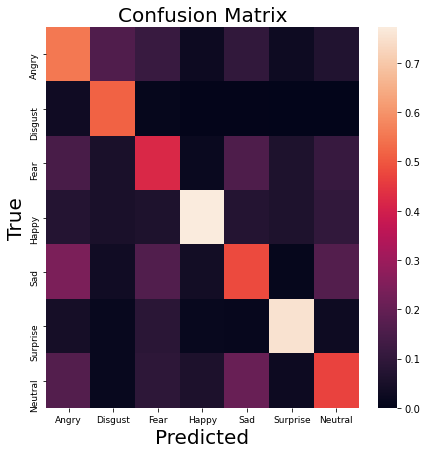

In [13]:
from matplotlib import pyplot as plt
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1) + 1e-9), annot=False, ax=ax)
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise','Neutral'], size=9); \
ax.yaxis.set_ticklabels(['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise','Neutral'], size=9);

In [14]:
model_json = model.to_json()
with open("ModelVGG16_50ep.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("ModelVGG16_50ep.h5")